In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi': 150})
plt.rcParams['font.sans-serif'] = 'Times New Roman'
import seaborn as sns
import plotly.express as px
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib

In [ ]:
data = pd.read_csv('FINAL_ARXIV_2025_copy.csv')

In [4]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date,comments,journals
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,NaN,"['Galaxies (573)', 'Astronomy image processing...",2025-01-01,"Submitted to AAS Journals. 10 pages, 4 figures...","ApJ (2025), 980 183"
1,X-ray reverberation black hole mass and distan...,We fit X-ray reverberation models to Rossi X-r...,"[""Patrick O'Neill"", 'Adam Ingram', 'Edward Nat...",16.0,18.0,1.0,arxiv.org/pdf/2501.12788,High Energy Astrophysical Phenomena,NaN,NaN,NaN,['powered by accretion of matter from a compan...,2025-01-01,"19 pages, 12 figures, accepted for publication...",NaN
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,NaN,[],2025-01-01,Accepted for publication in IEEE Transactions ...,NaN
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,NaN,"['Cosmic Rays 1', 'HII regions', 'Gamma rays',...",2025-01-01,Proceeding presented at the 8th Heidelberg Int...,NaN
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,NaN,['galaxies: rotation curve - galaxies: fundame...,2025-01-01,"19 pages, 12 figures, ApJ accepted",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18267,DESI Strong Lens Foundry V: A Sample of HST-Ob...,We present six galaxy-scale strong lenses with...,"['Xiaosheng Huang', 'David Alvarez-Garcia', 'M...",26.0,40.0,19.0,arxiv.org/pdf/2512.07823,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],NaN,SF2A-2025: Proceedings of the Annual meeting o...,['galaxies: high-redshift – gravitational lens...,2025-12-01,"40 pages, 26 figures, and 19 tables",NaN
18268,"Hot, Photoionized X-ray Gas in Two Luminous Ty...",We present new Chandra/ACIS-S imaging spectros...,"['Anna Trindade Falcão', 'S. Kraemer', 'L. Feu...",8.0,19.0,6.0,arxiv.org/pdf/2512.07793,Astrophysics of Galaxies,NaN,NaN,NaN,['High-luminosity active galactic nuclei'],2025-12-01,NaN,NaN
18269,Microquasar remnants as hidden PeVatrons,The Large High Altitude Air Shower Observatory...,"['Leandro Abaroa', 'Gustavo E. Romero', 'Valen...",3.0,4.0,0.0,arxiv.org/pdf/2512.07781,High Energy Astrophysical Phenomena,NaN,NaN,NaN,['Cosmic rays – relativistic processes – X-ray...,2025-12-01,Accepted as Letter in Astronomy and Astrophysi...,NaN
18270,X-ray Analysis of Gamma-Ray Burst Flares and U...,Gamma-ray burst (GRB) X-ray light curves exhib...,"['H. Dereli-Bégué', ""A. Pe'er"", 'D. Bégué', 'F...",10.0,28.0,4.0,arxiv.org/pdf/2512.07731,High Energy Astrophysical Phenomena,NaN,ApJ,NaN,"['Light Curves: X-ray', 'Gamma-ray bursts', 'R...",2025-12-01,Submitted to ApJ,NaN


In [132]:
# Cross-check pages and figures from comments
for i in range(len(data)):
    if isinstance(data.at[i, 'comments'], str):
        # Extract pages
        if 'pages' in data.at[i, 'comments'].lower():
            try:
                pages_part = data.at[i, 'comments'].lower().split('pages')[0]
                pages_str = pages_part.split()[-1]
                pages_str = pages_str.replace(',', '').replace('.', '').replace('(', '').replace(')', '')
                pages_str = int(pages_str)
                # Missmatch
                predicted_pages = data.at[i, 'pages']
                if int(pages_str) != predicted_pages:
                    print(f"Mismatch for index {i}: predicted {predicted_pages}, extracted {pages_str}")
                    data.at[i, 'pages'] = int(pages_str)
                else:
                    print(f"Match for index {i}: {predicted_pages} pages and extracted {pages_str} pages")
            except:
                pass
        # Extract figures
        if 'figures' in data.at[i, 'comments'].lower():
            try:
                figures_part = data.at[i, 'comments'].lower().split('figures')[0]
                figures_str = figures_part.split()[-1]
                figures_str = figures_str.replace(',', '').replace('.', '').replace('(', '').replace(')', '')
                figures_str = int(figures_str)
                predicted_figures = data.at[i, 'figures']
                if int(figures_str) != predicted_figures:
                    print(f"Mismatch for index {i}: predicted {predicted_figures}, extracted {figures_str}")
                    data.at[i, 'figures'] = int(figures_str)
                else:
                    print(f"Match for index {i}: {predicted_figures} figures and extracted {figures_str} figures")
            except:
                pass

Match for index 0: 10.0 pages and extracted 10 pages
Match for index 0: 4.0 figures and extracted 4 figures
Mismatch for index 1: predicted 18.0, extracted 19
Mismatch for index 1: predicted 16.0, extracted 12
Match for index 4: 19.0 pages and extracted 19 pages
Match for index 4: 12.0 figures and extracted 12 figures
Match for index 5: 19.0 pages and extracted 19 pages
Match for index 6: 43.0 pages and extracted 43 pages
Match for index 6: 11.0 figures and extracted 11 figures
Match for index 8: 5.0 pages and extracted 5 pages
Match for index 11: 16.0 pages and extracted 16 pages
Match for index 11: 18.0 figures and extracted 18 figures
Match for index 13: 11.0 pages and extracted 11 pages
Match for index 13: 14.0 figures and extracted 14 figures
Match for index 14: 19.0 pages and extracted 19 pages
Match for index 14: 15.0 figures and extracted 15 figures
Match for index 15: 9.0 pages and extracted 9 pages
Match for index 15: 4.0 figures and extracted 4 figures
Match for index 16: 13

In [137]:
# Un-naturally large page or figure counts
for i in range(len(data)):
    if data.at[i, 'pages'] > 100:
        print(f"Un-naturally large page count for paper {data['pdf_link'][i]}: {data.at[i, 'pages']} pages")
        corrected_pages = input("Enter corrected page count (or press Enter to skip): ")
        if corrected_pages.isdigit():
            data.at[i, 'pages'] = int(corrected_pages)
    if data.at[i, 'figures'] > 50:
        print(f"Un-naturally large figure count at index {data['pdf_link'][i]}: {data.at[i, 'figures']} figures")
        corrected_figures = input("Enter corrected figure count (or press Enter to skip): ")
        if corrected_figures.isdigit():
            data.at[i, 'figures'] = int(corrected_figures)

Un-naturally large figure count at index arxiv.org/pdf/2501.17997: 612.0 figures


Un-naturally large page count for paper arxiv.org/pdf/2501.18676: 172.0 pages
Un-naturally large figure count at index arxiv.org/pdf/2501.18676: 124.0 figures
Un-naturally large page count for paper arxiv.org/pdf/2501.03678: 320.0 pages
Un-naturally large figure count at index arxiv.org/pdf/2501.04098: 58.0 figures
Un-naturally large page count for paper arxiv.org/pdf/2501.03065: 283.0 pages
Un-naturally large figure count at index arxiv.org/pdf/2501.07402: 76.0 figures
Un-naturally large page count for paper arxiv.org/pdf/2502.16629: 192.0 pages
Un-naturally large figure count at index arxiv.org/pdf/2502.12262: 106.0 figures
Un-naturally large figure count at index arxiv.org/pdf/2502.20950: 75.0 figures
Un-naturally large page count for paper arxiv.org/pdf/2502.04436: 156.0 pages
Un-naturally large figure count at index arxiv.org/pdf/2502.04436: 104.0 figures
Un-naturally large figure count at index arxiv.org/pdf/2502.17570: 150.0 figures
Un-naturally large page count for paper arxiv.

In [ ]:
# Count the number of times the words 'submitted' or 'journal' or 'published' or 'accepted' appears in comments
counter = 0
for i in range(len(data)):
    if data['published_journal'][i] is not None and isinstance(data['published_journal'][i], str):
        continue
    if isinstance(data.at[i, 'comments'], str):
        comments_lower = data.at[i, 'comments'].lower()
        if 'submitted' in comments_lower or 'journal' in comments_lower or 'published' in comments_lower or 'accepted' in comments_lower:
            print(f"Publication info found in comments for index {i}: {data.at[i, 'comments']}")
            counter += 1

print(f"Total papers with publication info in comments: {counter}")


Publication info found in comments for index 0: Submitted to AAS Journals. 10 pages, 4 figures, 2 tables
Publication info found in comments for index 1: 19 pages, 12 figures, accepted for publication in MNRAS
Publication info found in comments for index 2: Accepted for publication in IEEE Transactions on Applied Superconductivity for ASC2024 special issue
Publication info found in comments for index 4: 19 pages, 12 figures, ApJ accepted
Publication info found in comments for index 8: 5 pages + appendix, accepted by MNRAS
Publication info found in comments for index 9: Accepted to appear in the Proceedings of the 17th Marcel Grossmann Meeting (MG17)/Pescara, Italy, 7-12 July 2024
Publication info found in comments for index 11: 16 pages, 18 figures, accepted for publication in Astronomy & Astrophysics
Publication info found in comments for index 14: 19 pages, 15 figures; Accepted for the publication in The Astrophysical Journal (ApJ)
Publication info found in comments for index 16: 13 p

In [11]:
# Standardizing journal names
# Accounting for shortened or alternative journal names

# shortened_journal_names = {
#     'ApJ': 'The Astrophysical Journal',
#     'ApJL': 'The Astrophysical Journal Letters',
#     'ApJS': 'The Astrophysical Journal Supplement Series',
#     'MNRAS': 'Monthly Notices of the Royal Astronomical Society',
#     'A&A': 'Astronomy & Astrophysics',
#     'AAS': 'American Astronomical Society',
#     'AJ': 'The Astronomical Journal',
#     'PASP': 'Publications of the Astronomical Society of the Pacific',
#     'Nature Astronomy': 'Nature Astronomy',
#     'Science': 'Science',
#     'PRD': 'Physical Review D',
#     'PRL': 'Physical Review Letters',
#     'JOSS': 'The Journal of Open Source Software',
#     'PASA': 'Publications of the Astronomical Society of Australia',
#     'IEEE': 'Institute of Electrical and Electronics Engineers',
#     'JHEP': 'Journal of High Energy Physics',
#     'JAA': 'Journal of Astrophysics and Astronomy',
#     'RAA': 'Research in Astronomy and Astrophysics',
#     'Phys Rev D': 'Physical Review D',
#     'PASJ': 'Publications of the Astronomical Society of Japan',
#     'RMxAA': 'Revista Mexicana de Astronomía y Astrofísica',
#     'OJA': 'The Open Journal of Astrophysics',
#     'Astrophysical Bulletin': 'Astrophysical Bulletin',
#     'AJP': 'American Journal of Physics',
#     'A&A': 'Astronomy and Astrophysics',
#     'New Astronmy': 'New Astronomy',
#     'JCAP': 'Journal of Cosmology and Astroparticle Physics',
#     'MNRAS Letters': 'Monthly Notices of the Royal Astronomical Society Letters',
#     'GAFD': 'Geophysical and Astrophysical Fluid Dynamics',
#     'Solar Physics': 'Solar Physics',
#     'Symmetry': 'Symmetry',
#     'RNAAS': 'Research Notes of the American Astronomical Society'
# }

journal_map = {
    # Astronomy & Astrophysics
    "Astronomy & Astrophysics": "A&A",
    "Astronomy and Astrophysics": "A&A",
    "Astronomy and Astrophysis": "A&A", # Handling typo found in text
    "A&A": "A&A",
    "Astron. Astrophys.": "A&A",
    "Astronomy & Astrophysics Letters": "A&A", # Often cited as just A&A or A&AL
    "A&A Letters": "A&A",
    "A&A Letter": "A&A",

    # American Astronomical Society Journals
    "American Astronomical Society": "AAS",
    "AAS": "AAS",
    "AAS Journals": "AAS",
    "AAS Journal": "AAS",
    "AAS Main Journal": "AAS",
    "AAS Letters": "AASL",
    "AASL": "AASL",
    
    # The Astrophysical Journal (Main)
    "The Astrophysical Journal": "ApJ",
    "Astrophysical Journal": "ApJ",
    "ApJ": "ApJ",
    "Ap.J.": "ApJ",
    
    # The Astrophysical Journal Letters
    "The Astrophysical Journal Letters": "ApJL",
    "Astrophysical Journal Letters": "ApJL",
    "ApJ Letters": "ApJL",
    "ApJ Lett": "ApJL",
    "ApJL": "ApJL",
    
    # The Astrophysical Journal Supplement Series
    "The Astrophysical Journal Supplement Series": "ApJS",
    "The Astrophysical Journal Supplement": "ApJS",
    "Astrophysical Journal Supplement": "ApJS",
    "ApJ Supplement": "ApJS",
    "ApJS": "ApJS",
    
    # The Astronomical Journal
    "The Astronomical Journal": "AJ",
    "Astronomical Journal": "AJ",
    "AJ": "AJ",
    
    # Monthly Notices of the Royal Astronomical Society
    "Monthly Notices of the Royal Astronomical Society": "MNRAS",
    "Monthly Notices of Royal Astronomical Society": "MNRAS",
    "MNRAS": "MNRAS",
    "MNRAS Main Journal": "MNRAS",
    "Monthly Notices of the Royal Astronomical Society Letters": "MNRASL",
    "MNRAS Letters": "MNRASL",
    
    # Physical Review
    "Physical Review D": "PRD",
    "Phys. Rev. D": "PRD",
    "PRD": "PRD",
    "Physical Review Letters": "PRL",
    "Phys. Rev. Lett.": "PRL",
    "PRL": "PRL",
    "Physical Review C": "PRC",
    "PRC": "PRC",
    "Physical Review E": "PRE",
    "Phys. Rev. E": "PRE",
    
    # Cosmology & Astroparticle
    "Journal of Cosmology and Astroparticle Physics": "JCAP",
    "JCAP": "JCAP",
    "Astroparticle Physics": "APh",
    
    # Pacific / Japan / Australia / China
    "Publications of the Astronomical Society of the Pacific": "PASP",
    "PASP": "PASP",
    "Publications of the Astronomical Society of Japan": "PASJ",
    "PASJ": "PASJ",
    "Publications of the Astronomical Society of Australia": "PASA",
    "PASA": "PASA",
    "Research in Astronomy and Astrophysics": "RAA",
    "RAA": "RAA",
    "Science China Physics, Mechanics & Astronomy": "SCPMA",
    "SCPMA": "SCPMA",
    "Chinese Physics C": "ChPhC",
    
    # New / Open Journals
    "The Open Journal of Astrophysics": "OJAp",
    "Open Journal of Astrophysics": "OJAp",
    "OJAp": "OJAp",
    "OJA": "OJAp",
    "The Planetary Science Journal": "PSJ",
    "Planetary Science Journal": "PSJ",
    "PSJ": "PSJ",
    "Research Notes of the AAS": "RNAAS",
    "Research Notes of the American Astronomical Society": "RNAAS",
    "RNAAS": "RNAAS",
    
    # High Energy / Instrumentation
    "Journal of High Energy Astrophysics": "JHEAP",
    "JHEAp": "JHEAP",
    "JHEAP": "JHEAP",
    "Journal of Astronomical Telescopes, Instruments, and Systems": "JATIS",
    "JATIS": "JATIS",
    "RAS Techniques and Instruments": "RASTI",
    "RASTI": "RASTI",
    "Journal of Instrumentation": "JINST",
    "JINST": "JINST",
    "Nuclear Instruments and Methods in Physics Research A": "NIMPA",
    "NIMA": "NIMPA",
    
    # Other Major Journals
    "Nature": "Nature",
    "Nature Astronomy": "NatAs",
    "Nature Communications": "NatCo",
    "Science": "Science",
    "Science Advances": "SciAv",
    "Solar Physics": "SoPh",
    "Icarus": "Icarus",
    "New Astronomy": "NewA",
    "New Astronomy Reviews": "NewAR",
    "Astronomische Nachrichten": "AN",
    "Astronomical Notes": "AN",
    "Astrophysics and Space Science": "Ap&SS",
    "Ap&SS": "Ap&SS",
    "Universe": "Univ",
    "Galaxies": "Galax",
    "Symmetry": "Symm",
    "Physics of the Dark Universe": "PDU",
    "Journal of Astrophysics and Astronomy": "JApA",
    "JoAA": "JApA",
    "Revista Mexicana de Astronomía y Astrofísica": "RMxAA",
    "RevMexAA": "RMxAA",
    "Experimental Astronomy": "ExpA",
    "Astronomy and Computing": "A&C",
    "Astronomy & Computing": "A&C",
    "Advances in Space Research": "AdSpR",
    "Journal of Open Source Software": "JOSS",
    "JOSS": "JOSS"
}

for i in range(len(data)):
    # Standardize existing journal names if they are in the map
    if data.at[i, 'published_journal'] in journal_map:
        data.at[i, 'published_journal'] = journal_map[data.at[i, 'published_journal']]

    # Check comments for journal names to fill or update
    if isinstance(data.at[i, 'comments'], str):
        comment_lower = data.at[i, 'comments'].lower()
        for key, short_name in journal_map.items():
            if key.lower() in comment_lower:
                data.at[i, 'published_journal'] = short_name

In [12]:
# Count number of journal names after standardization
print(data['published_journal'].notna().sum())

10978


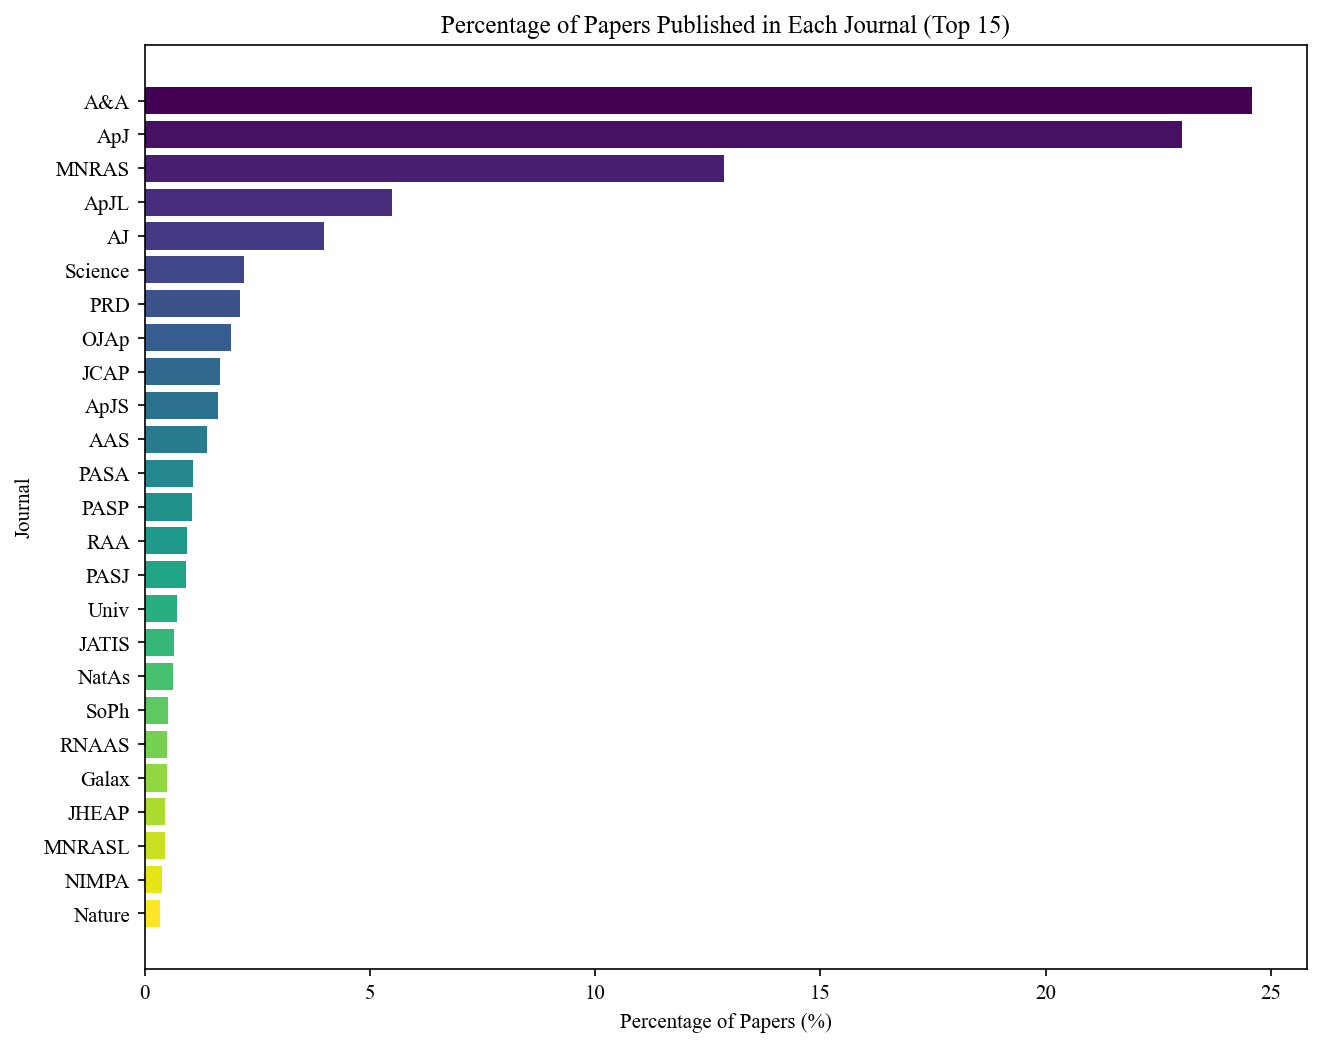

In [13]:
# Plotting percentage of papers published in each journal
journal_counts = data['published_journal'].value_counts(normalize=True).head(25) * 100
plt.figure(figsize=(10, 8))
plt.barh(journal_counts.index, journal_counts.values, color=plt.cm.viridis(np.linspace(0, 1, len(journal_counts))))
plt.xlabel('Percentage of Papers (%)')
plt.ylabel('Journal')
plt.title('Percentage of Papers Published in Each Journal (Top 15)')
plt.gca().invert_yaxis()
plt.show()

In [82]:
list_of_telescopes = [
    'HST',
    'Chandra',
    'Spitzer',
    'JWST',
    'VLT',
    'ALMA',
    'Keck',
    'Subaru',
    'Euclid',
    'Vera C. Rubin Observatory',
    'SDSS',
    'GAIA',
    'ZWICKY',
    'LIGO',
    'LISA',
    'Fermi',
    'Swift',
    'TESS',
    'NICER',
    'NuSTAR',
    'XMM-Newton',
    'INTEGRAL',
    'SPHEREx',
    'SVOM',
    'AstroSat',
    'HXMT',
    'XRISM',
    'Einstein Probe',
    'IXPE',
    'XPoSat',
    'IRIS',
    'CUTE',
    'GLIDE',
    'NEOSSat',
    'CHEOPS',
    'DAMPE',
    'CALCET',
    'LSST',
]

long_names = {
    'HST': 'Hubble Space Telescope',
    'JWST': 'James Webb Space Telescope',
    'VLT': 'Very Large Telescope',
    'ALMA': 'Atacama Large Millimeter/submillimeter Array',
    'SDSS': 'Sloan Digital Sky Survey',
    'LIGO': 'Laser Interferometer Gravitational-Wave Observatory',
    'LISA': 'Laser Interferometer Space Antenna',
    'ZWICKY': 'Zwicky Transient Facility',
    'Chandra': 'Chandra X-ray Observatory',
    'Spitzer': 'Spitzer Space Telescope',
    'Fermi': 'Fermi Gamma-ray Space Telescope',
    'Swift': 'Neil Gehrels Swift Observatory',
    'TESS': 'Transiting Exoplanet Survey Satellite',
    'NICER': 'Neutron star Interior Composition Explorer',
    'GAIA': 'Global Astrometric Interferometer for Astrophysics',
    'NuSTAR': 'Nuclear Spectroscopic Telescope Array',
    'XMM-Newton': 'X-ray Multi-Mirror Mission - Newton',
    'INTEGRAL': 'INTErnational Gamma-Ray Astrophysics Laboratory',
    'SPHEREx': 'Spectro-Photometer for the History of the Universe, Epoch of Reionization, and Ices Explorer',
    'SVOM': 'Space-based multi-band astronomical Variable Objects Monitor',
    'AstroSat': 'AstroSat Space Observatory',
    'HXMT': 'Hard X-ray Modulation Telescope',
    'XRISM': 'X-ray Imaging and Spectroscopy Mission',
    'Einstein Probe': 'Einstein Probe X-ray Observatory',
    'IXPE': 'Imaging X-ray Polarimetry Explorer',
    'XPoSat': 'X-ray Polarimeter Satellite',
    'IRIS': 'Interface Region Imaging Spectrograph',
    'CUTE': 'Colorado Ultraviolet Transit Experiment',
    'GLIDE': 'Carruthers Geocorona Observatory',
    'NEOSSat': 'Near-Earth Object Surveillance Satellite',
    'CHEOPS': 'Characterising Exoplanet Satellite',
    'DAMPE': 'DArk Matter Particle Explorer',
    'CALCET': 'CALorimetric Electron Telescope',
    'RST': 'Roman Space Telescope',
    'RST': 'Nancy Grace Roman Space Telescope',
    'LSST': 'Legacy Survey of Space and Time',
    'Rubin': 'Vera C. Rubin Observatory',
}

data['telescope'] = np.nan

for i in range(len(data)):
    if isinstance(data.at[i, 'title'], str):
        for telescope in list_of_telescopes:
            if telescope.lower() in data.at[i, 'title'].lower():
                # Assign the short form (telescope) directly
                data.at[i, 'telescope'] = telescope
    if isinstance(data.at[i, 'abstract'], str):
        for telescope in list_of_telescopes:
            if telescope.lower() in data.at[i, 'abstract'].lower():
                data.at[i, 'telescope'] = telescope

In [83]:
mask = data['telescope'].notna()
masked_data = data[mask]
masked_data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date,telescope
2,The TES-based Cryogenic AntiCoincidence Detect...,The Cryogenic AntiCoincidence Detector (CryoAC...,"[""Matteo D'Andrea"", 'Claudio Macculi', 'Simone...",17.0,8.0,0.0,arxiv.org/pdf/2501.12781,Instrumentation and Methods for Astrophysics,NaN,IEEE Transactions on Applied Superconductivity...,NaN,[],2025-01-01,INTEGRAL
3,Massive star clusters in the gamma-ray sky: th...,Massive Star Clusters (SCs) have been proposed...,"['Giada Peron', 'Giovanni Morlino', 'Stefano G...",3.0,5.0,1.0,arxiv.org/pdf/2501.12767,High Energy Astrophysical Phenomena,NaN,NaN,NaN,"['Cosmic Rays 1', 'HII regions', 'Gamma rays',...",2025-01-01,Fermi
4,The Impact of Bar-induced Non-Circular Motions...,We study the impact of bar-induced non-circula...,"['Jie Liu', 'Zhi Li', 'Juntai Shen']",12.0,19.0,1.0,arxiv.org/pdf/2501.12760,Astrophysics of Galaxies,NaN,NaN,NaN,['galaxies: rotation curve - galaxies: fundame...,2025-01-01,ALMA
9,IXPE observations of supernova remnants,Supernova remnants (SNRs) are among the most i...,['Riccardo Ferrazzoli'],9.0,14.0,1.0,arxiv.org/pdf/2501.12719,High Energy Astrophysical Phenomena,NaN,appear in the Proceedings of the 17th Marcel G...,NaN,[],2025-01-01,IXPE
15,On the equivalence between galaxy angular corr...,We investigate the angular power spectrum ($C_...,"['Ryo Terasawa', 'Yue Nan', 'Masahiro Takada']",4.0,9.0,0.0,arxiv.org/pdf/2501.12661,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,[],2025-01-01,INTEGRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,Detection of 27 Candidate Circumbinary Planets...,Most circumbinary planets have been discovered...,"['Margo Thornton', 'Benjamin T. Montet', 'Rile...",12.0,17.0,2.0,arxiv.org/pdf/2512.07934,Earth and Planetary Astrophysics,['Solar and Stellar Astrophysics'],NaN,NaN,['observational–planetsandsatellites:detection...,2025-12-01,TESS
18267,DESI Strong Lens Foundry V: A Sample of HST-Ob...,We present six galaxy-scale strong lenses with...,"['Xiaosheng Huang', 'David Alvarez-Garcia', 'M...",26.0,40.0,19.0,arxiv.org/pdf/2512.07823,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],NaN,SF2A-2025: Proceedings of the Annual meeting o...,['galaxies: high-redshift – gravitational lens...,2025-12-01,Euclid
18268,"Hot, Photoionized X-ray Gas in Two Luminous Ty...",We present new Chandra/ACIS-S imaging spectros...,"['Anna Trindade Falcão', 'S. Kraemer', 'L. Feu...",8.0,19.0,6.0,arxiv.org/pdf/2512.07793,Astrophysics of Galaxies,NaN,NaN,NaN,['High-luminosity active galactic nuclei'],2025-12-01,Chandra
18270,X-ray Analysis of Gamma-Ray Burst Flares and U...,Gamma-ray burst (GRB) X-ray light curves exhib...,"['H. Dereli-Bégué', ""A. Pe'er"", 'D. Bégué', 'F...",10.0,28.0,4.0,arxiv.org/pdf/2512.07731,High Energy Astrophysical Phenomena,NaN,ApJ,NaN,"['Light Curves: X-ray', 'Gamma-ray bursts', 'R...",2025-12-01,Swift


In [108]:
# Loading jpeg
from PIL import Image
jwst_img = Image.open('Images/james-webb-space-telescope-graphic-illustration-astronomy-vector.jpg')
gaia_img = Image.open('Images/images.jpeg')
alma_img = Image.open('Images/alma-features.png')
tess_img = Image.open('Images/tess-telescope.png')
integral_img = Image.open('Images/INTEGRAL_spacecraft_model.png')
fermi_img = Image.open('Images/Fermi_Gamma-ray_Space_Telescope_spacecraft_model.png')
sdss_img = Image.open('Images/SDSS_telescope.png')
lisa_img = Image.open('Images/Lisa_logo-mission-patch-1024x1024.jpg')
lsst_img = Image.open('Images/Large_Synoptic_Survey_Telescope_3_4_render_2013.png')
newton_img = Image.open('Images/XMM-Newton_spacecraft_model.png')

image_list = {
    'JWST': jwst_img,
    'GAIA': gaia_img,
    'ALMA': alma_img,
    'TESS': tess_img,
    'INTEGRAL': integral_img,
    'Fermi': fermi_img,
    'SDSS': sdss_img,
    'LISA': lisa_img,
    'LSST': lsst_img,
    'XMM-Newton': newton_img,
}

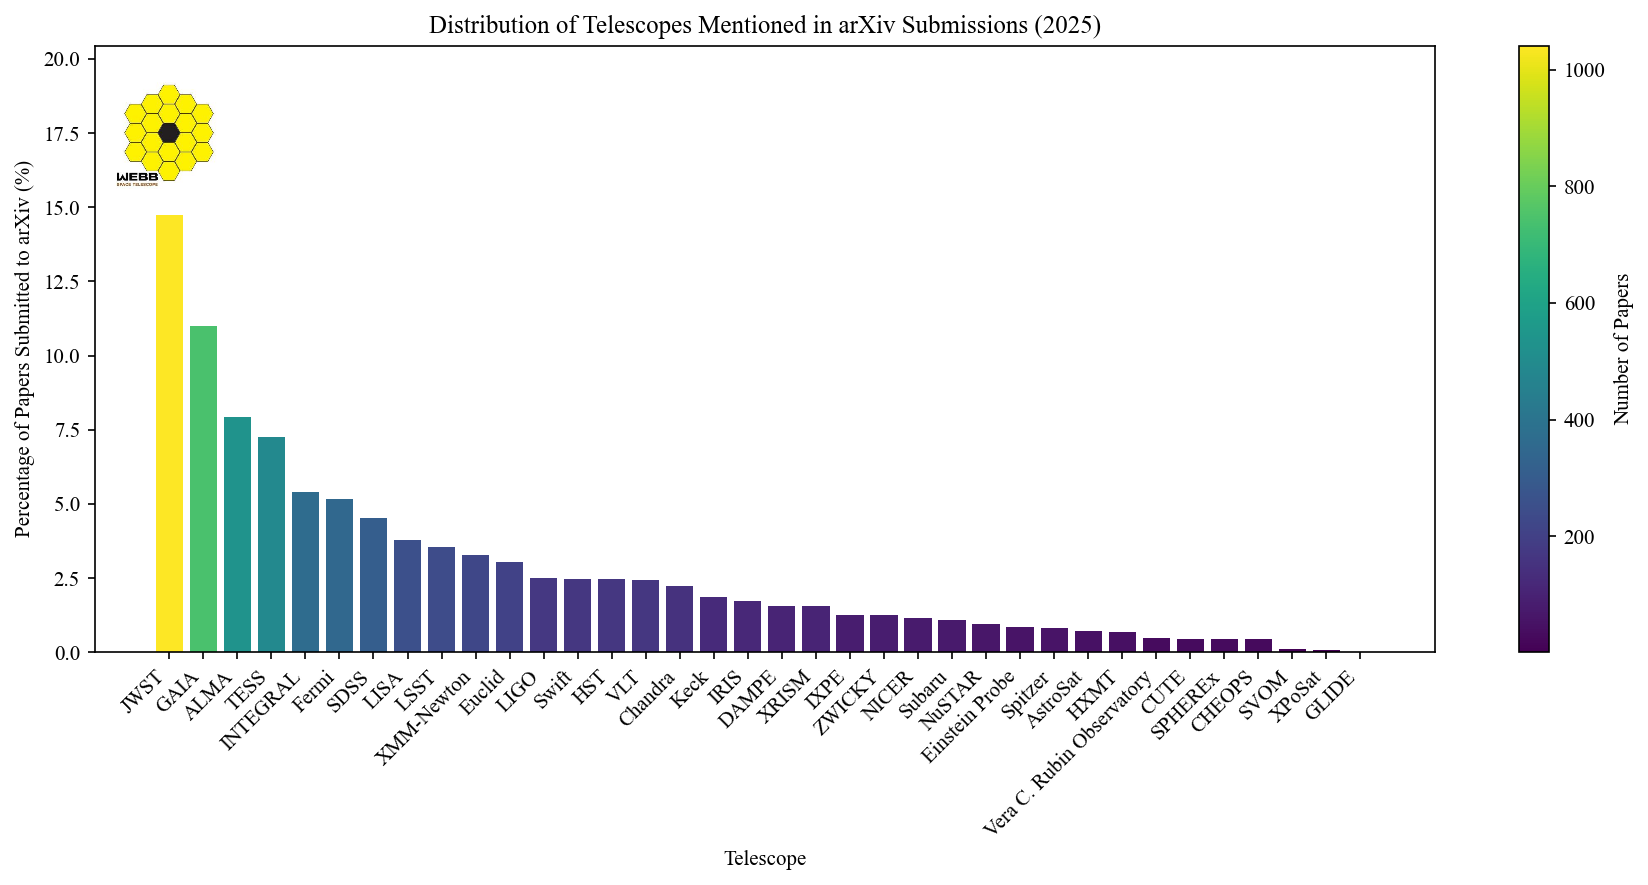

In [ ]:
# Calculate counts and percentages
counts = masked_data['telescope'].value_counts()
percentages = (counts / len(masked_data)) * 100

# Create a colormap based on the raw counts
norm = plt.Normalize(counts.min(), counts.max())
colors = plt.cm.viridis(norm(counts.values))

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(counts.index, percentages, color=colors)

# Overlay the image on the JWST bar
target_telescope = 'JWST'
if target_telescope in counts.index:
    # Get the integer location (x) and height (y)
    x_loc = counts.index.get_loc(target_telescope)
    bar_height = percentages[target_telescope]
    
    # Create an OffsetImage
    # Adjust 'zoom' to change the size of the image
    imagebox = OffsetImage(img, zoom=0.2) 
    
    # Create the AnnotationBbox
    # xy is the anchor point (center of the bar top)
    # xybox is the offset in points (0, 10 means 10 points up)
    ab = AnnotationBbox(imagebox, (x_loc, bar_height),
                        xybox=(0, 25),
                        xycoords='data',
                        boxcoords="offset points",
                        frameon=False)
    ax.add_artist(ab)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Telescope')
plt.ylabel('Percentage of Papers Submitted to arXiv (%)')
plt.title('Distribution of Telescopes Mentioned in arXiv Submissions (2025)')
plt.ylim(0, max(percentages) + 5)

# Add a colorbar to indicate the number of papers
sm = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Number of Papers')

plt.tight_layout()
plt.show()

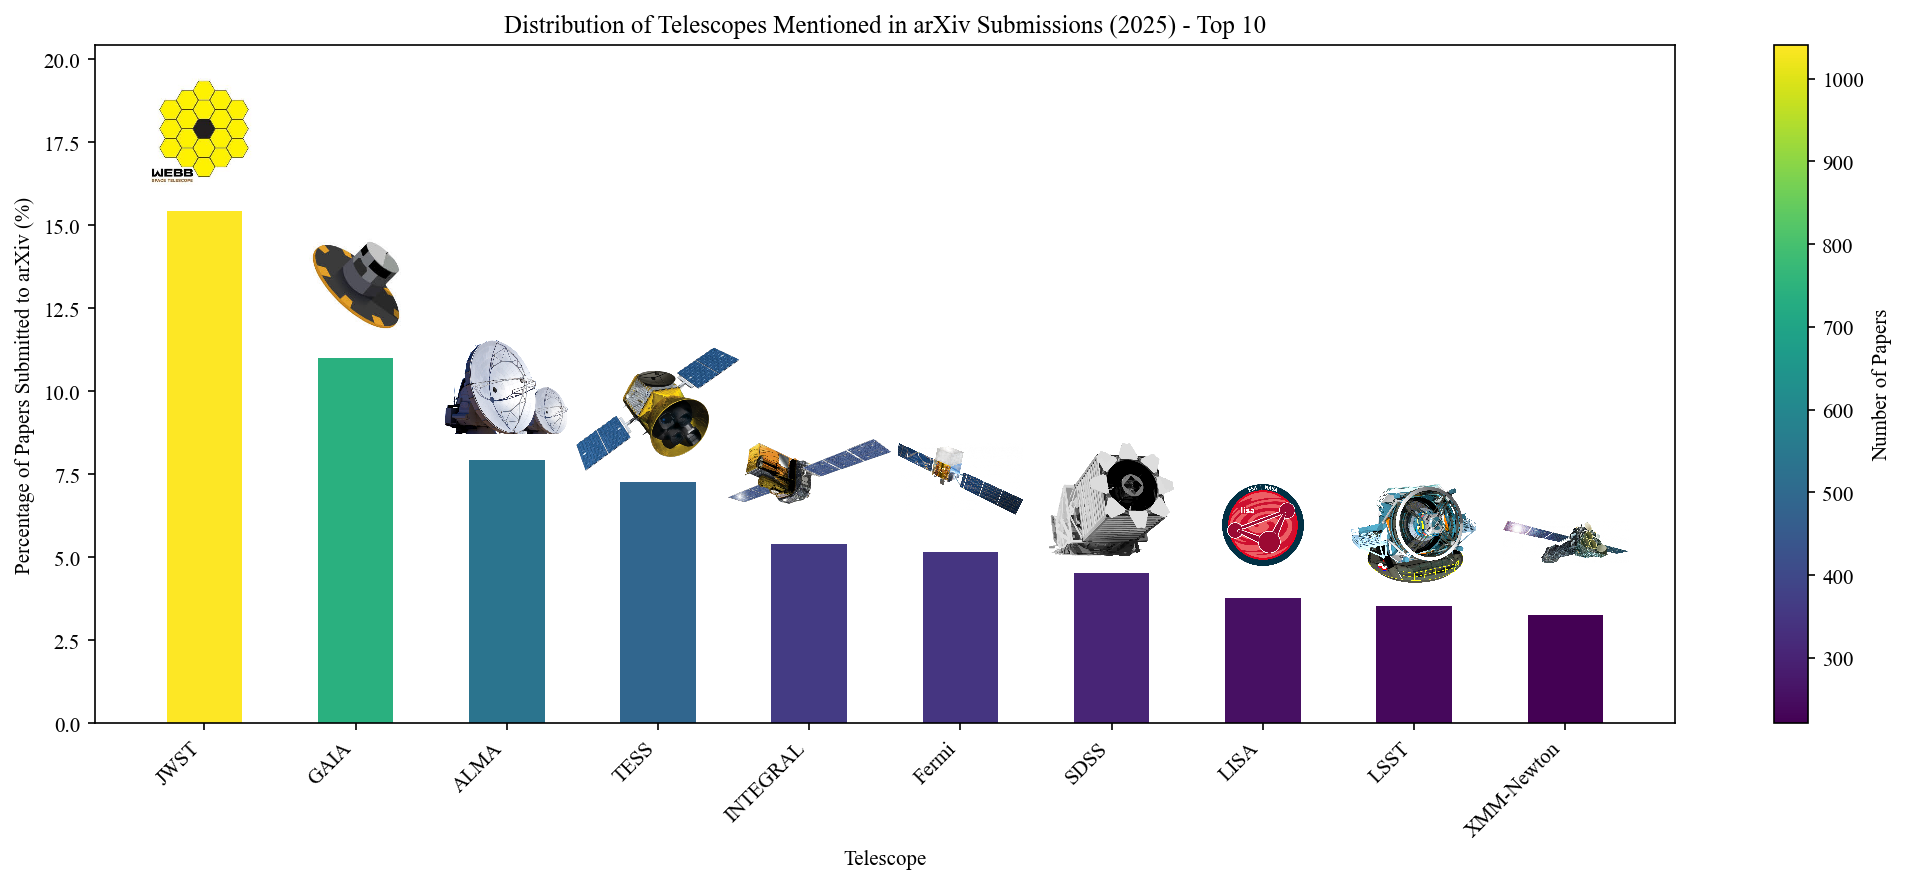

In [112]:
import matplotlib
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Calculate counts and percentages
# Limit to top 10
counts = masked_data['telescope'].value_counts().head(10)
percentages = (counts / len(masked_data)) * 100

# Create a colormap based on the raw counts
norm = plt.Normalize(counts.min(), counts.max())
colors = plt.cm.viridis(norm(counts.values))

# Plot
fig, ax = plt.subplots(figsize=(14, 6))
# Increase space between bars by reducing width (default is 0.8)
bars = ax.bar(counts.index, percentages, color=colors, width=0.5)


zoom_list = [0.2, 0.25, 0.09, 0.15, 0.08, 0.02, 0.1, 0.04, 0.03, 0.02]

# Overlay images on the bars
for telescope_name, image_file in image_list.items():
    if telescope_name in counts.index:
        # Get the integer location (x) and height (y)
        x_loc = counts.index.get_loc(telescope_name)
        bar_height = percentages[telescope_name]
        
        # Create an OffsetImage
        # You might need to adjust zoom for each image individually if they have different sizes
        # Using a smaller zoom as default for multiple images
        imagebox = OffsetImage(image_file, zoom=zoom_list[x_loc]) 
        
        # Create the AnnotationBbox
        # xy is the anchor point (center of the bar top)
        # xybox is the offset in points (0, 10 means 10 points up)
        ab = AnnotationBbox(imagebox, (x_loc, bar_height),
                            xybox=(0, 35),
                            xycoords='data',
                            boxcoords="offset points",
                            frameon=False)
        ax.add_artist(ab)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Telescope')
plt.ylabel('Percentage of Papers Submitted to arXiv (%)')
plt.title('Distribution of Telescopes Mentioned in arXiv Submissions (2025) - Top 10')
plt.ylim(0, max(percentages) + 5)

# Add a colorbar to indicate the number of papers
sm = matplotlib.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Number of Papers')

plt.tight_layout()
plt.show()